In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.io.constants import FIFF
from mne.evoked import EvokedArray, _aspect_rev
from mne import io
from mne.datasets import sample, somato, spm_face

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10.0, 6.0)  # Change figure sizes

## Preprocess sample dataset

In [3]:
data_path = sample.data_path()

# Set parameters
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'
tmin, tmax = -0.2, 0.5

# Select events to extract epochs from.
event_id = {'Auditory/Left': 1, 'Auditory/Right': 2}

#   Setup for reading the raw data
raw = io.Raw(raw_fname)
events = mne.read_events(event_fname)

#   Plot raw data

#   Set up pick list: EEG + STI 014 - bad channels (modify to your needs)
include = []  # or stim channels ['STI 014']
raw.info['bads'] = ['MEG 2443', 'EEG 053']  # set bads

# pick EEG and MEG channels
picks = mne.pick_types(raw.info, meg=True, eeg=True, stim=False, eog=True,
                       include=include, exclude='bads')
# Read epochs
sample_epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                    baseline=(None, 0), reject=dict(eeg=80e-6, eog=150e-6),
                    preload=True)
sample_epochs_no_drop = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                        baseline=(None, 0), reject=None,
                        preload=True)

sample_epochs.drop_bad_epochs()

Opening raw data file /home/mje/Toolboxes/anaconda/lib/python2.7/site-packages/examples/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
Current compensation grade : 0
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
145 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Loading data for 145 events and 106 original time points ...
    Rejecting  epoch based on EEG : [u'EEG 001', u'EEG 002', u'EEG 003', u'EEG 007']
    Rejecting  epoch based on EEG : [u'EEG 001', u'EEG 002', u'EEG 003', u'EEG 004', u'EEG 005', u'EEG 006', u'EEG 007']
    Rejecting  epoch based on EEG : [u'EEG 001', u'EEG 002', u'EEG 003', u'EEG 007']
    Rejecting  epoch based on EEG : [u'EEG 001', u'EEG 002', u'EEG 003', u'EE

# Preprocessing  

## Preprocess somato dataset

In [4]:
data_path = somato.data_path()
raw_fname = data_path + '/MEG/somato/sef_raw_sss.fif'
event_id, tmin, tmax = 1, -1., 3.

# Setup for reading the raw data
raw = io.Raw(raw_fname)
baseline = (None, 0)
events = mne.find_events(raw, stim_channel='STI 014')

# picks MEG gradiometers
picks = mne.pick_types(raw.info, meg=True, eeg=True, eog=True, stim=False)

somato_epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                    baseline=baseline, reject=dict(grad=4000e-13, eog=350e-6))
somato_epochs.drop_bad_epochs()

Opening raw data file /home/mje/Toolboxes/anaconda/lib/python2.7/site-packages/mne-0.12.dev0-py2.7.egg/examples/MNE-somato-data/MEG/somato/sef_raw_sss.fif...
Current compensation grade : 0
    Range : 237600 ... 506999 =    791.189 ...  1688.266 secs
Ready.
111 events found
Events id: [1]
111 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 111 events and 1202 original time points ...
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
3 bad epochs dropped


## Preprocess SPM face dataset

In [5]:
data_path = spm_face.data_path()
raw_fname = data_path + '/MEG/spm/SPM_CTF_MEG_example_faces%d_3D.ds'

raw = mne.io.read_raw_ctf(raw_fname % 1, preload=True)  # Take first run
# Here to save memory and time we'll downsample heavily -- this is not
# advised for real data as it can effectively jitter events!

picks = mne.pick_types(raw.info, meg=True, exclude='bads')
raw.filter(1, 30, method='iir')

events = mne.find_events(raw, stim_channel='UPPT001')

event_ids = {"faces": 1, "scrambled": 2}

tmin, tmax = -0.2, 0.6
baseline = None  # no baseline as high-pass is applied
reject = dict(mag=5e-12)

spm_epochs = mne.Epochs(raw, events, event_ids, tmin, tmax,  picks=picks,
                    baseline=baseline, preload=True, reject=reject)

ds directory : /home/mje/Toolboxes/anaconda/lib/python2.7/site-packages/mne-0.12.dev0-py2.7.egg/examples/MNE-spm-face/MEG/spm/SPM_CTF_MEG_example_faces1_3D.ds
    res4 data read.
    hc data read.
    Separate EEG position data file not present.
    Quaternion matching (desired vs. transformed):
      -0.90   72.01    0.00 mm <->   -0.90   72.01    0.00 mm (orig :  -43.09   61.46 -252.17 mm) diff =    0.000 mm
       0.90  -72.01    0.00 mm <->    0.90  -72.01    0.00 mm (orig :   53.49  -45.24 -258.02 mm) diff =    0.000 mm
      98.30    0.00    0.00 mm <->   98.30   -0.00    0.00 mm (orig :   78.60   72.16 -241.87 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
    Measurement info composed.
Finding samples for /home/mje/Toolboxes/anaconda/lib/python2.7/site-packages/mne-0.12.dev0-py2.7.egg/examples/MNE-spm-face/MEG/spm/SPM_CTF_MEG_example_faces1_3D.ds/SPM_CTF_MEG_example

# Functions

##  Robust averaging
Robust averaging function is based on JR Kings.

In [6]:
def robust_mean(X, axis=0, percentile=[5, 95]):
    """Do robust mean based on JR Kings implementation."""
    X = np.array(X)
    axis_ = axis
    # force axis to be 0 for facilitation
    if axis is not None and axis != 0:
        X = np.transpose(X, [axis] + range(0, axis) + range(axis+1, X.ndim))
        axis_ = 0
    mM = np.percentile(X, percentile, axis=axis_)
    indices_min = np.where((X - mM[0][np.newaxis, ...]) < 0)
    indices_max = np.where((X - mM[1][np.newaxis, ...]) > 0)
    X[indices_min] = np.nan
    X[indices_max] = np.nan
    m = np.nanmean(X, axis=axis_)
    return m

## Compute mean function 
Based on the average method from mne.epochs

In [7]:
def compute_mean_or_stderr(epochs, picks=None, mode='ave'):
    """Compute the mean or std over epochs and return Evoked."""
    n_channels = len(epochs.ch_names)
    n_times = len(epochs.times)

    if mode == "stderr":
        fun = np.std
    elif mode == "median":
        fun = np.median
    elif mode == "robust":
        fun = robust_mean
    else:
        fun = np.mean

    if epochs.preload:
        n_events = len(epochs.events)
        data = fun(epochs._data, axis=0)
        assert len(epochs.events) == len(epochs._data)
    else:
        data = np.zeros((n_channels, n_times))
        n_events = 0
        for e in epochs:
            data += e
            n_events += 1

        if n_events > 0:
            data /= n_events
        else:
            data.fill(np.nan)

        # convert to stderr if requested, could do in one pass but do in
        # two (slower) in case there are large numbers
        if mode == "stderr":
            data_mean = data.copy()
            data.fill(0.)
            for e in epochs:
                data += (e - data_mean) ** 2
            data = np.sqrt(data / n_events)

    if mode is not "stderr":
        _aspect_kind = FIFF.FIFFV_ASPECT_AVERAGE
    else:
        _aspect_kind = FIFF.FIFFV_ASPECT_STD_ERR
        data /= np.sqrt(n_events)
    return data, epochs.info, picks, n_events, _aspect_kind


# Make averages

## SPM faces 

In [8]:
data, info, picks, n_events, aspect_kind = compute_mean_or_stderr(spm_epochs, mode="ave")
kind = _aspect_rev.get(str(aspect_kind), 'Unknown')
spm_mean = EvokedArray(data, info, tmin=spm_epochs.times[0],
                       comment="mean", nave=n_events, kind=kind)
spm_mean.times = spm_epochs.times.copy()

In [9]:
data, info, picks, n_events, aspect_kind = compute_mean_or_stderr(spm_epochs, mode="robust")
kind = _aspect_rev.get(str(aspect_kind), 'Unknown')
spm_robust = EvokedArray(data, info, tmin=spm_epochs.times[0],
                       comment="mean", nave=n_events, kind=kind)
spm_robust.times = spm_epochs.times.copy()

In [10]:
data, info, picks, n_events, aspect_kind = compute_mean_or_stderr(spm_epochs, mode="median")
kind = _aspect_rev.get(str(aspect_kind), 'Unknown')
spm_median = EvokedArray(data, info, tmin=spm_epochs.times[0],
                       comment="mean", nave=n_events, kind=kind)
spm_median.times = spm_epochs.times.copy()

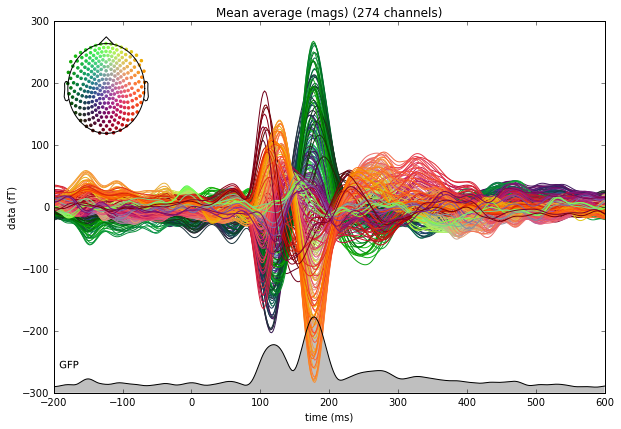

/home/mje/Toolboxes/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


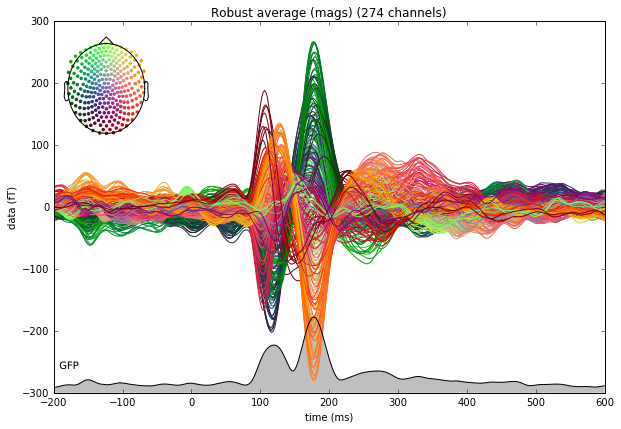

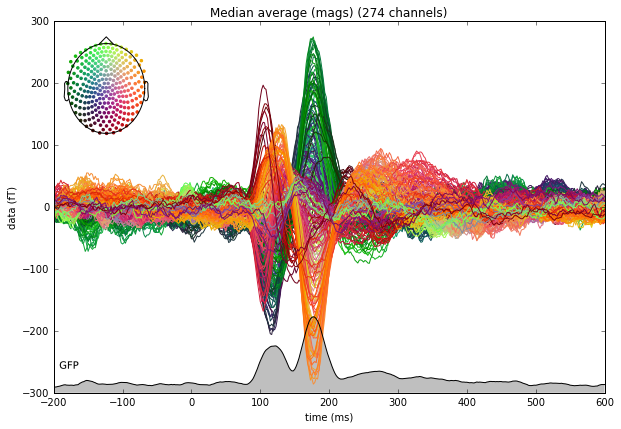

In [11]:
picks = mne.pick_types(spm_epochs.info, meg="mag", eeg=False)

fig_mean = spm_mean.plot(gfp=True, spatial_colors=True, titles="Mean average (mags)", picks=picks)
fig_robust = spm_robust.plot(gfp=True, spatial_colors=True, titles="Robust average (mags)", picks=picks)
fig_median = spm_median.plot(gfp=True, spatial_colors=True, titles="Median average (mags)", picks=picks)

## Sample dataset

In [12]:
data, info, picks, n_events, aspect_kind = compute_mean_or_stderr(sample_epochs, mode="ave")
kind = _aspect_rev.get(str(aspect_kind), 'Unknown')
sample_mean = EvokedArray(data, info, tmin=sample_epochs.times[0],
                       comment="mean", nave=n_events, kind=kind)
sample_mean.times = sample_epochs.times.copy()

In [13]:
data, info, picks, n_events, aspect_kind = compute_mean_or_stderr(sample_epochs, mode="robust")
kind = _aspect_rev.get(str(aspect_kind), 'Unknown')
sample_robust = EvokedArray(data, info, tmin=sample_epochs.times[0],
                       comment="mean", nave=n_events, kind=kind)
sample_robust.times = sample_epochs.times.copy()

In [14]:
data, info, picks, n_events, aspect_kind = compute_mean_or_stderr(sample_epochs, mode="median")
kind = _aspect_rev.get(str(aspect_kind), 'Unknown')
sample_median = EvokedArray(data, info, tmin=sample_epochs.times[0],
                       comment="mean", nave=n_events, kind=kind)
sample_median.times = sample_epochs.times.copy()

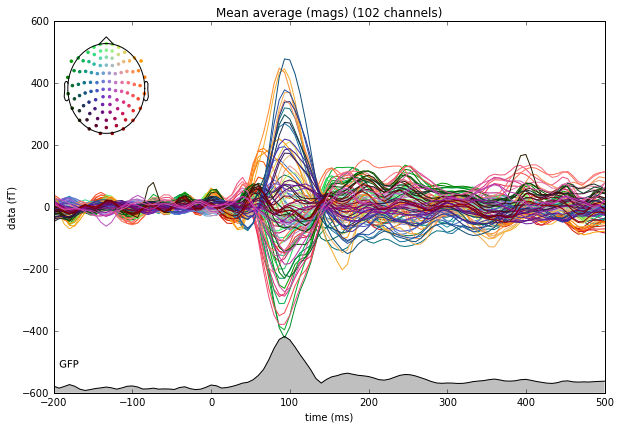

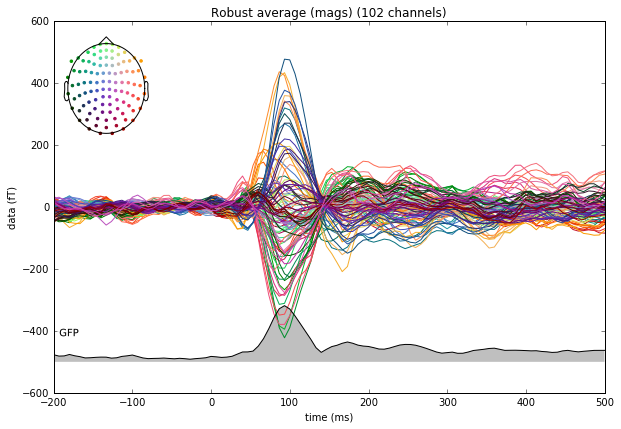

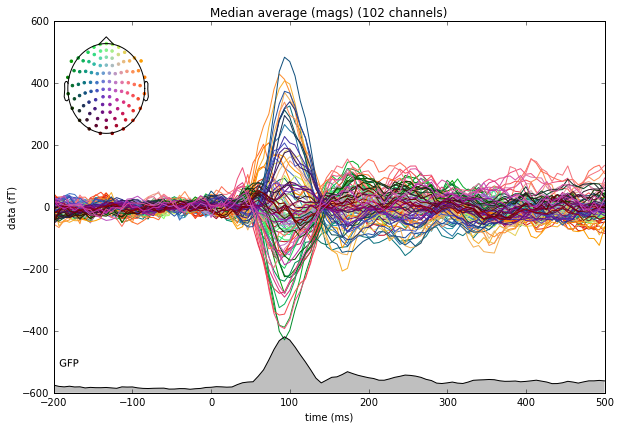

In [15]:
picks = mne.pick_types(sample_epochs.info, meg="mag", eeg=False)

fig_mean = sample_mean.plot(gfp=True, spatial_colors=True, titles="Mean average (mags)", picks=picks)
fig_robust = sample_robust.plot(gfp=True, spatial_colors=True, titles="Robust average (mags)", picks=picks)
fig_median = sample_median.plot(gfp=True, spatial_colors=True, titles="Median average (mags)", picks=picks)

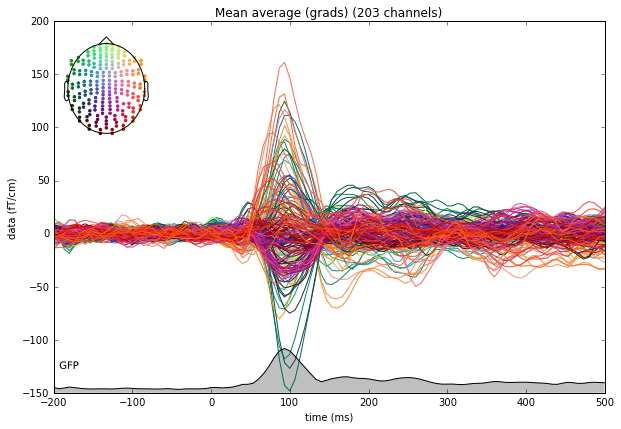

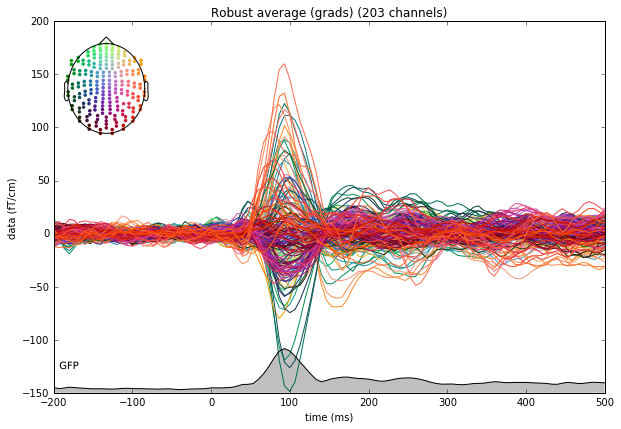

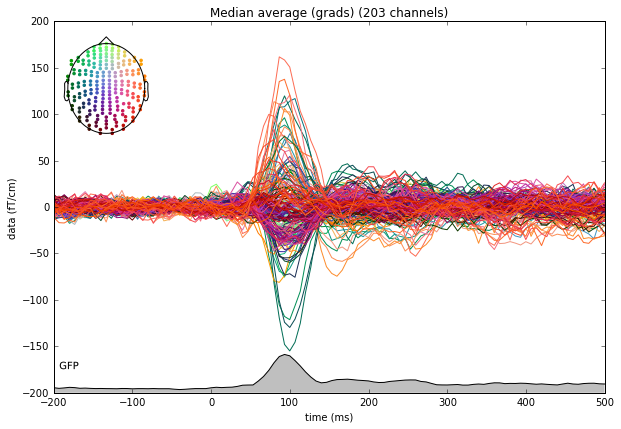

In [16]:
picks = mne.pick_types(sample_epochs.info, meg="grad", eeg=False)

fig_mean = sample_mean.plot(gfp=True, spatial_colors=True, titles="Mean average (grads)", picks=picks)
fig_robust = sample_robust.plot(gfp=True, spatial_colors=True, titles="Robust average (grads)", picks=picks)
fig_median = sample_median.plot(gfp=True, spatial_colors=True, titles="Median average (grads)", picks=picks)

##  Somato dataset

In [17]:
data, info, picks, n_events, aspect_kind = compute_mean_or_stderr(somato_epochs, mode="ave")
kind = _aspect_rev.get(str(aspect_kind), 'Unknown')
somato_mean = EvokedArray(data, info, tmin=somato_epochs.times[0],
                       comment="mean", nave=n_events, kind=kind)
somato_mean.times = somato_epochs.times.copy()

In [18]:
data, info, picks, n_events, aspect_kind = compute_mean_or_stderr(somato_epochs, mode="robust")
kind = _aspect_rev.get(str(aspect_kind), 'Unknown')
somato_robust = EvokedArray(data, info, tmin=somato_epochs.times[0],
                       comment="mean", nave=n_events, kind=kind)
somato_robust.times = somato_epochs.times.copy()

In [19]:
data, info, picks, n_events, aspect_kind = compute_mean_or_stderr(somato_epochs, mode="median")
kind = _aspect_rev.get(str(aspect_kind), 'Unknown')
somato_median = EvokedArray(data, info, tmin=somato_epochs.times[0],
                       comment="mean", nave=n_events, kind=kind)
somato_median.times = somato_epochs.times.copy()

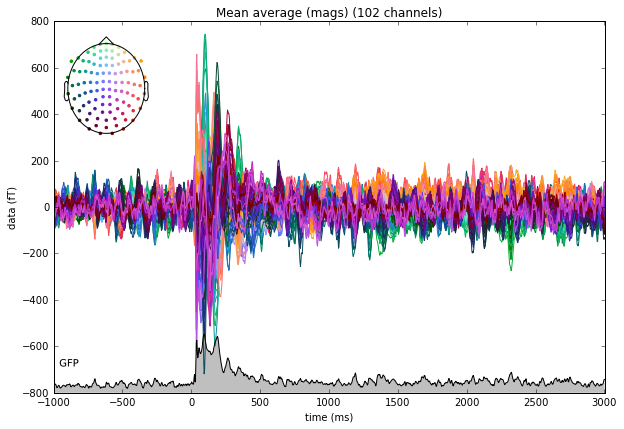

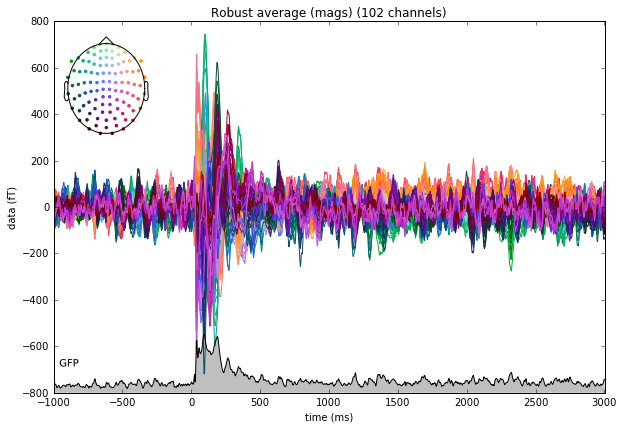

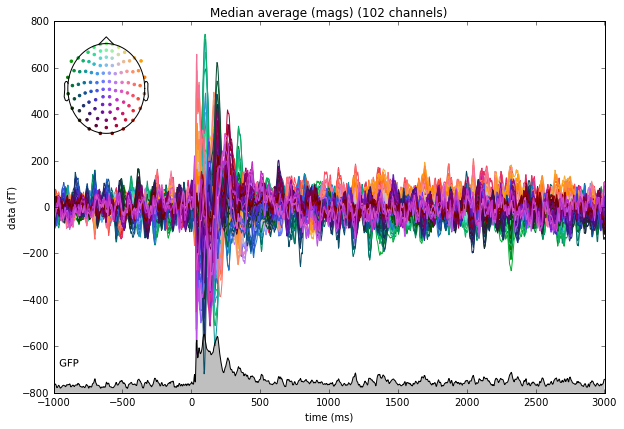

In [20]:
picks = mne.pick_types(somato_epochs.info, meg="mag", eeg=False)

fig_mean = somato_mean.plot(gfp=True, spatial_colors=True, titles="Mean average (mags)", picks=picks)
fig_robust = somato_robust.plot(gfp=True, spatial_colors=True, titles="Robust average (mags)", picks=picks)
fig_median = somato_median.plot(gfp=True, spatial_colors=True, titles="Median average (mags)", picks=picks)

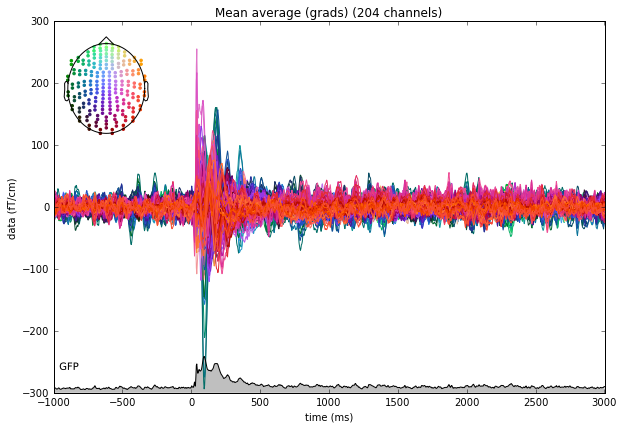

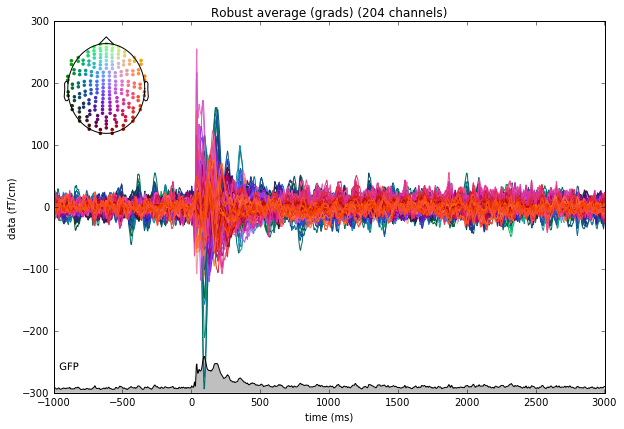

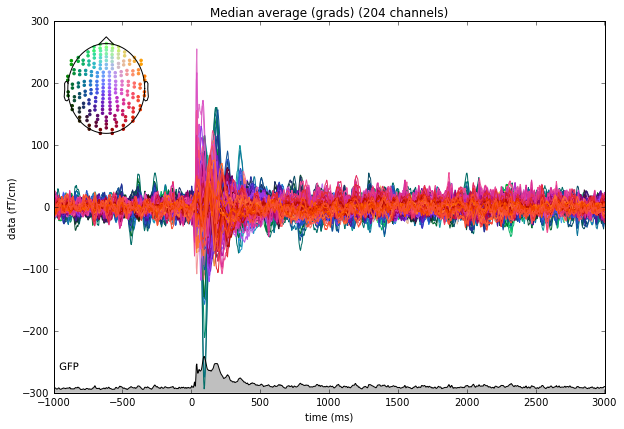

In [21]:
picks = mne.pick_types(somato_epochs.info, meg="grad", eeg=False)

fig_mean = somato_mean.plot(gfp=True, spatial_colors=True, titles="Mean average (grads)", picks=picks)
fig_robust = somato_robust.plot(gfp=True, spatial_colors=True, titles="Robust average (grads)", picks=picks)
fig_median = somato_median.plot(gfp=True, spatial_colors=True, titles="Median average (grads)", picks=picks)

#  Compare no drop vs drop for Sample

In [22]:
data, info, picks, n_events, aspect_kind = compute_mean_or_stderr(sample_epochs, mode="ave")
kind = _aspect_rev.get(str(aspect_kind), 'Unknown')
sample_mean = EvokedArray(data, info, tmin=sample_epochs.times[0],
                       comment="mean", nave=n_events, kind=kind)
sample_mean.times = sample_epochs.times.copy()

In [23]:
data, info, picks, n_events, aspect_kind = compute_mean_or_stderr(sample_epochs, mode="robust")
kind = _aspect_rev.get(str(aspect_kind), 'Unknown')
sample_robust = EvokedArray(data, info, tmin=sample_epochs.times[0],
                       comment="mean", nave=n_events, kind=kind)
sample_robust.times = sample_epochs.times.copy()

In [24]:
data, info, picks, n_events, aspect_kind = compute_mean_or_stderr(sample_epochs_no_drop, mode="ave")
kind = _aspect_rev.get(str(aspect_kind), 'Unknown')
sample_nd_mean = EvokedArray(data, info, tmin=sample_epochs_no_drop.times[0],
                       comment="mean", nave=n_events, kind=kind)
sample_nd_mean.times = sample_epochs_no_drop.times.copy()

In [25]:
data, info, picks, n_events, aspect_kind = compute_mean_or_stderr(sample_epochs_no_drop, mode="robust")
kind = _aspect_rev.get(str(aspect_kind), 'Unknown')
sample_nd_robust = EvokedArray(data, info, tmin=sample_epochs_no_drop.times[0],
                       comment="mean", nave=n_events, kind=kind)
sample_nd_robust.times = sample_epochs_no_drop.times.copy()

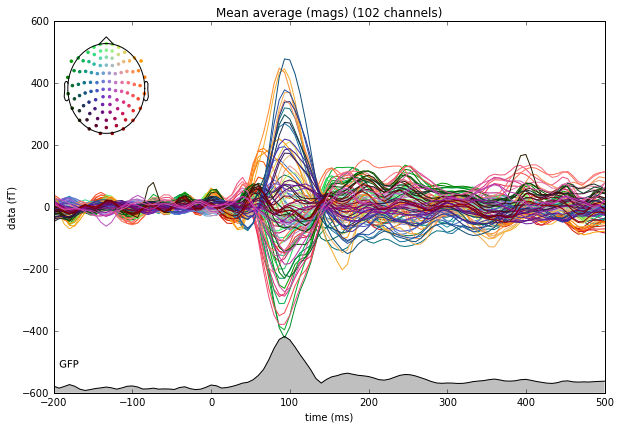

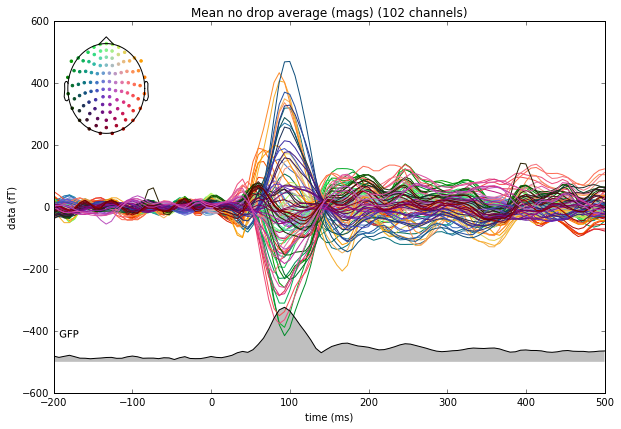

In [26]:
picks = mne.pick_types(sample_epochs.info, meg="mag", eeg=False)

fig_mean = sample_mean.plot(gfp=True, spatial_colors=True, titles="Mean average (mags)", picks=picks)
fig_robust = sample_nd_mean.plot(gfp=True, spatial_colors=True, titles="Mean no drop average (mags)", picks=picks)


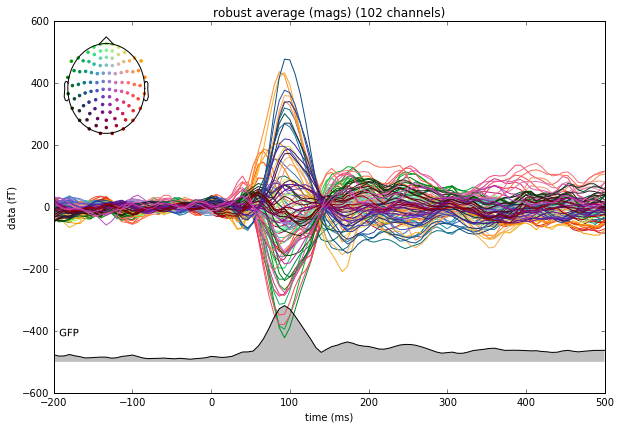

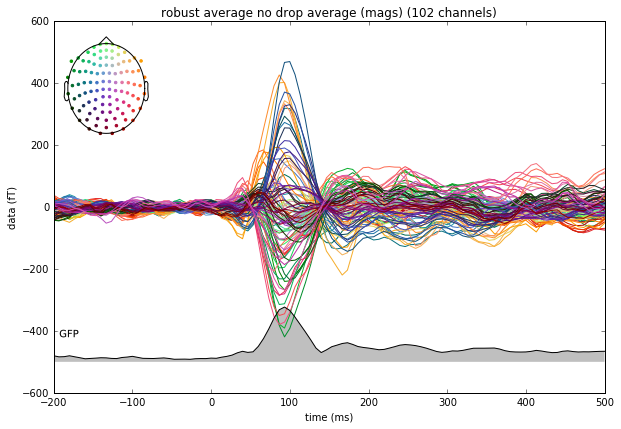

In [27]:
picks = mne.pick_types(sample_epochs.info, meg="mag", eeg=False)

fig_mean = sample_robust.plot(gfp=True, spatial_colors=True, titles="robust average (mags)", picks=picks)
fig_robust = sample_nd_robust.plot(gfp=True, spatial_colors=True, titles="robust average no drop average (mags)", picks=picks)


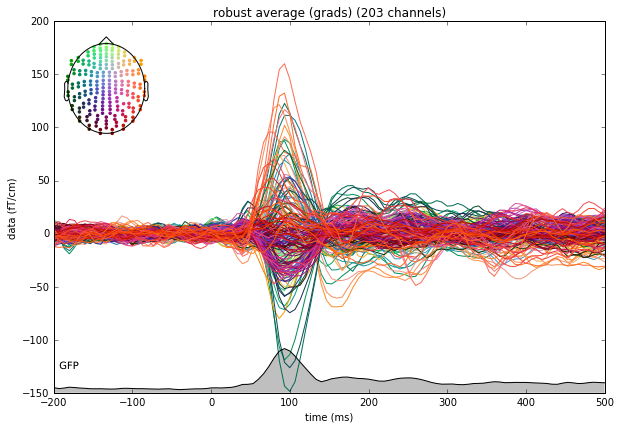

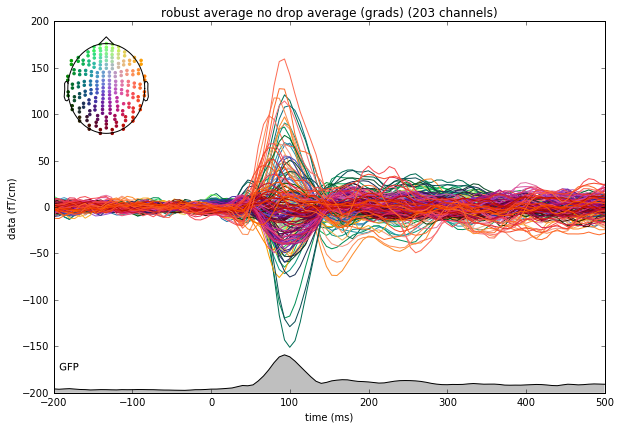

In [28]:
picks = mne.pick_types(sample_epochs.info, meg="grad", eeg=False)

fig_mean = sample_robust.plot(gfp=True, spatial_colors=True, titles="robust average (grads)", picks=picks)
fig_robust = sample_nd_robust.plot(gfp=True, spatial_colors=True, titles="robust average no drop average (grads)", picks=picks)


In [29]:
diff_mean = mne.combine_evoked([sample_mean, sample_nd_mean], weights=[1, -1])
diff_robust = mne.combine_evoked([sample_robust, sample_nd_robust], weights=[1, -1])

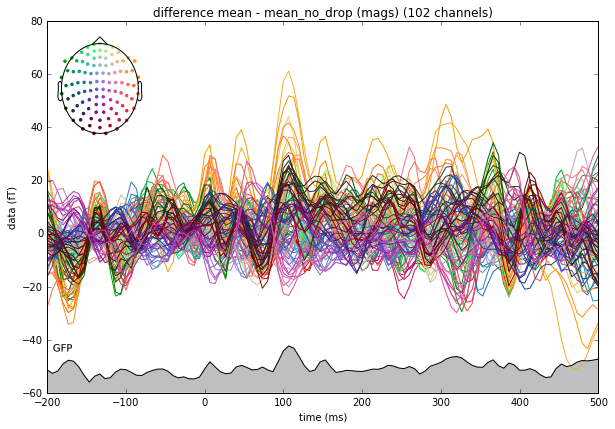

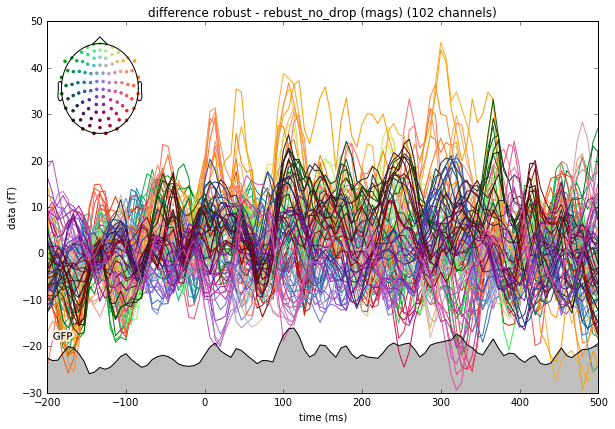

In [30]:
picks = mne.pick_types(sample_epochs.info, meg="mag", eeg=False)

fig_mean = diff_mean.plot(gfp=True, spatial_colors=True, titles="difference mean - mean_no_drop (mags)", picks=picks)
fig_robust = diff_robust.plot(gfp=True, spatial_colors=True, titles="difference robust - rebust_no_drop (mags)", picks=picks)

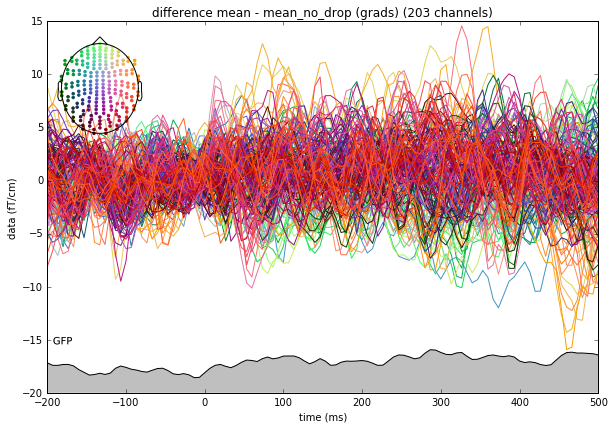

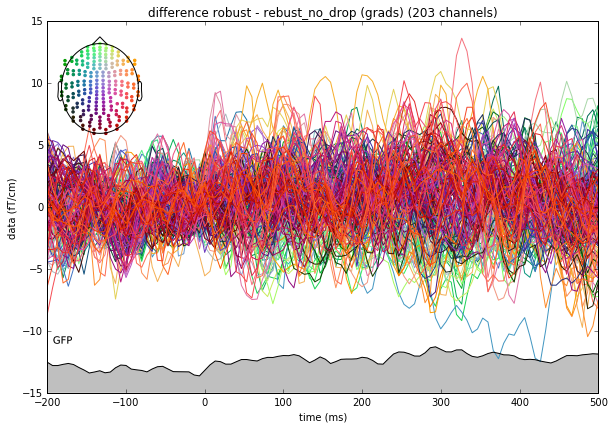

In [31]:
picks = mne.pick_types(sample_epochs.info, meg="grad", eeg=False)

fig_mean = diff_mean.plot(gfp=True, spatial_colors=True, titles="difference mean - mean_no_drop (grads)", picks=picks)
fig_robust = diff_robust.plot(gfp=True, spatial_colors=True, titles="difference robust - rebust_no_drop (grads)", picks=picks)